# Voraussetzung: Packages installieren

In [1]:
%pip install -r req_NeurNetz.txt

Note: you may need to restart the kernel to use updated packages.


# 1. Bibliotheken importieren

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# 2. Daten laden

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")  

# 3. Daten bereinigen

In [4]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df.dropna(inplace=True)
df.drop("customerID", axis=1, inplace=True)

# 4. Kategorische Variablen codieren

In [5]:
label_encoders = {}
for col in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 5. Features und Ziel definieren

In [6]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

# 6. Trainings-/Testdaten aufteilen

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Standardisierung (wichtig für neuronale Netze)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Neuronales Netz trainieren

In [9]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=300, random_state=42)
mlp.fit(X_train_scaled, y_train)

C:\Users\anast\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)

# 9. Vorhersage

In [10]:
y_pred = mlp.predict(X_test_scaled)

# 10. Evaluation

In [11]:
print("📊 Bewertung – Neuronales Netz:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("\nKlassifikationsbericht:\n", classification_report(y_test, y_pred))

📊 Bewertung – Neuronales Netz:
Accuracy: 0.7505330490405118
Precision: 0.5329512893982808
Recall: 0.49732620320855614
F1-Score: 0.5145228215767634

Klassifikationsbericht:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1033
           1       0.53      0.50      0.51       374

    accuracy                           0.75      1407
   macro avg       0.68      0.67      0.67      1407
weighted avg       0.75      0.75      0.75      1407



# 11. Konfusionsmatrix

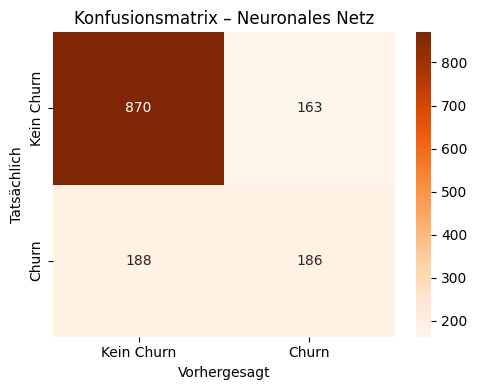

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=["Kein Churn", "Churn"], yticklabels=["Kein Churn", "Churn"])
plt.title("Konfusionsmatrix – Neuronales Netz")
plt.xlabel("Vorhergesagt")
plt.ylabel("Tatsächlich")
plt.tight_layout()
plt.show()